# pyCLAMs (CLassifiability Analysis Metrics)

An integrated toolkit for classifiability analysis

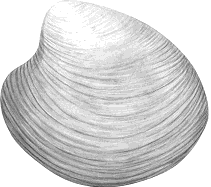



# API demostration of pyCLAMs.py

import the library

In [1]:
from clams import *

Unable to determine R home: [WinError 2] The system cannot find the file specified


rpy2 3.X may not support Windows. ECoL metrics may not be available.


## A list of all supported metrics


    ['classification.ACC',
     'classification.Kappa',
     'classification.F1_Score',
     'classification.Jaccard',
     'classification.Precision',
     'classification.Recall',
     'classification.McNemar',
     'classification.McNemar.CHI2',
     'classification.CochranQ',
     'classification.CochranQ.T',
     'classification.CrossEntropy',
     'classification.Mean_KLD',
     'classification.AP',
     'classification.Brier',
     'classification.ROC_AUC',
     'classification.PR_AUC',
     'classification.BER',
     'correlation.IG',
     'correlation.IG.max',
     'correlation.r',
     'correlation.r2',
     'correlation.r.p',
     'correlation.r.max',
     'correlation.r.p.min',
     'correlation.rho',
     'correlation.rho.p',
     'correlation.rho.max',
     'correlation.rho.p.min',
     'correlation.tau',
     'correlation.tau.p',
     'correlation.tau.max',
     'correlation.tau.p.min',
     'test.ES',
     'test.ES.max',
     'test.ANOVA',
     'test.ANOVA.min',
     'test.ANOVA.min.log10',
     'test.ANOVA.F',
     'test.ANOVA.F.max',
     'test.MANOVA',
     'test.MANOVA.log10',
     'test.MANOVA.F',
     'test.MWW',
     'test.MWW.min',
     'test.MWW.min.log10',
     'test.MWW.U',
     'test.MWW.U.min',
     'test.KS',
     'test.KS.min',
     'test.KS.min.log10',
     'test.KS.D',
     'test.KS.D.max',
     'test.CHISQ',
     'test.CHISQ.min',
     'test.CHISQ.min.log10',
     'test.CHISQ.CHI2',
     'test.CHISQ.CHI2.max',
     'overlapping.F1.mean',
     'overlapping.F1.sd',
     'overlapping.F1v.mean',
     'overlapping.F1v.sd',
     'overlapping.F2.mean',
     'overlapping.F2.sd',
     'overlapping.F3.mean',
     'overlapping.F3.sd',
     'overlapping.F4.mean',
     'overlapping.F4.sd',
     'neighborhood.N1',
     'neighborhood.N2.mean',
     'neighborhood.N2.sd',
     'neighborhood.N3.mean',
     'neighborhood.N3.sd',
     'neighborhood.N4.mean',
     'neighborhood.N4.sd',
     'neighborhood.T1.mean',
     'neighborhood.T1.sd',
     'neighborhood.LSC',
     'linearity.L1.mean',
     'linearity.L1.sd']

In [2]:
# Total metric number
len(metrics_keys())

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)
R[write to console]: Loading required package: ECoL



79

# The following demostrate main API functions

## `mvg`

generates a 2D dataset with a specified between-class distance

In [3]:
df = pd.read_csv('sample.csv')
X = np.array(df.iloc[:,:-1]) # skip first and last cols
y = np.array(df.iloc[:,-1])

<AxesSubplot:>

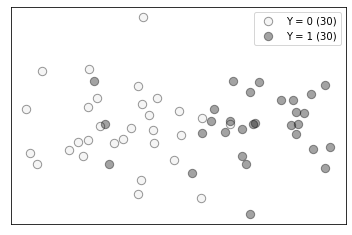

In [4]:
# or generate a toy dataset by X,y = mvg(md = 2)
X.shape, y.shape
plotComponents2D(X,y,labels = set(y))

## `BER`

Bayes Error Rate.

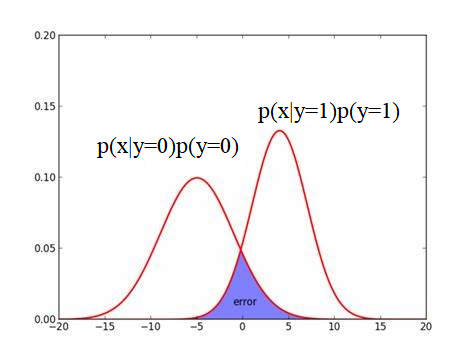

$$ BER= 1- E ({\max}_j P(Y=j|X) $$

It is the lowest possible test error rate in classification which is produced by the Bayes classifier. It is analogous to the irreducible error rate.  
Because of noise (inherently stochastic), the error incurred by the oracle prediction model from the true distribution p(x,y) is the Bayes error.  
The Bayes optimal decision boundary will correspond to the point where two densities are equal. 

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


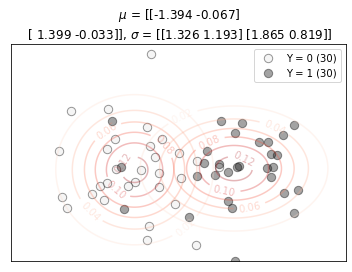

In [5]:
ber, _ = BER(X,y, show = True)

## `CLF`

Classification Accuracy by a n-fold CV SVM

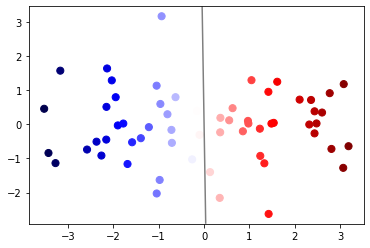

In [6]:
_ = CLF(X, y, verbose = True, show = True)

## `IG`

Information Gain. Output the IG between each feature Xi and y.  

Information gain has been used in decision tree. For a specific feature, Information gain (IG) measures how much “information” a feature gives us about the class.

$IG(Y|X) = H(Y) - H(Y|X) $  

In information theory, IG answers "if we transmit Y, how many bits can be saved if both sender and receiver know X?" Or "how much information of Y is implied in X?"

Attribute/feature X with a high IG is a good split on Y.

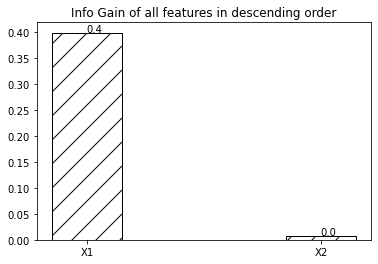

In [7]:
ig, _ = IG(X,y,show = True)

## `ANOVA`

Perform ANOVA test on each feature Xi.

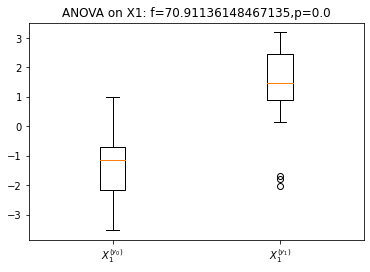

ANOVA on X1: f=70.91136148467135,p=0.0


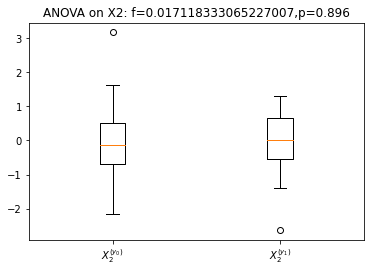

ANOVA on X2: f=0.017118333065227007,p=0.896


In [8]:
p, F, _ = ANOVA(X,y, verbose = True, show = True)

## `MANOVA`

Perform MANOVA test on the first N features.

In [9]:
p, F, _ = MANOVA(X,y, verbose = True)

endog: ['X1', 'X2']
exog: ['Intercept', 'y']

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.6201 2.0000 57.0000 17.4576 0.0000
         Pillai's trace 0.3799 2.0000 57.0000 17.4576 0.0000
 Hotelling-Lawley trace 0.6125 2.0000 57.0000 17.4576 0.0000
    Roy's greatest root 0.6125 2.0000 57.0000 17.4576 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
           y            Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.4497 2.0000 57.0000 34.8823 0.0000
         Pillai's trace 0.5503 2.0000 57.0000 34.8823 0.0

## `MWW`

Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test.
This test can be used to determine whether two independent （独立、非配对） samples were selected from populations having the same distribution.

Other non-parametric tests are not suitable for classifiability analysis. For example, chi-square test is for nominal data. Signed rank sum test (符号秩和检验) is for paired (相关\配对样本) samples. 

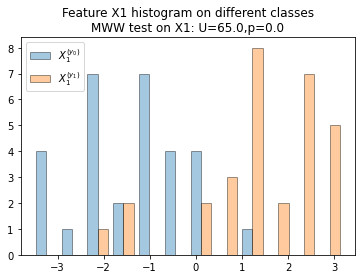

MWW test on X1: U=65.0,p=0.0


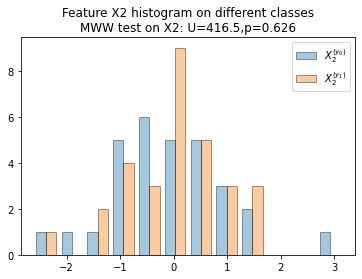

MWW test on X2: U=416.5,p=0.626


In [10]:
p, U, _ = MWW(X,y, verbose = True, show = True)

## `cohen_d`

Cohen's d effect size. Use the pooled standard deviation internally.

$$ Cohen_d = { {\mu_2 - \mu_1} \over \sigma }=  {{\mu_2 - \mu_1} \over {SD_{pooled}}}  $$

The Pooled Standard Deviation is

$$ SD_{pooled} = \sqrt { {(n_1-1) SD_1^2 + (n_2-1) SD_2^2 } \over {n_1 + n_2 - 2} }  $$

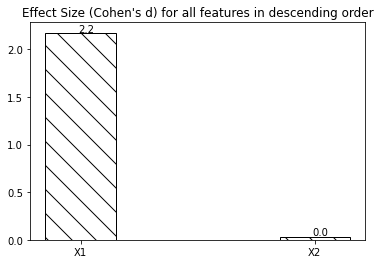

In [11]:
es, _ = cohen_d(X, y, show = True)

## `Pearson r`, `Spearman rho`, `Kendall tau`

Besides these three correlation coefficients, IG/MI can also be seen as a measure of correlation.

In [12]:
correlate(X,y, verbose = True)



#### Correlation between X1 and y ####

Pearson r: 0.742, p-value: 0.0
Spearman rho: 0.741, p-value: 0.0
Kendall's tau: 0.61, p-value: 0.0

#### Correlation between X2 and y ####

Pearson r: 0.017, p-value: 0.896
Spearman rho: 0.064, p-value: 0.625
Kendall's tau: 0.053, p-value: 0.62


({'correlation.r': [0.7416727355635289, 0.017177211340979777],
  'correlation.r2': array([5.50078447e-01, 2.95056589e-04]),
  'correlation.r.p': [1.2116341137234975e-11, 0.8963569761285588],
  'correlation.r.max': 0.7416727355635289,
  'correlation.r.p.min': 1.2116341137234975e-11,
  'correlation.rho': [0.7410357742436601, 0.0644806320198157],
  'correlation.rho.p': [1.2886434965392313e-11, 0.6245104252555516],
  'correlation.rho.max': 0.7410357742436601,
  'correlation.rho.p.min': 1.2886434965392313e-11,
  'correlation.tau': [0.6100744502949613, 0.053099402170811265],
  'correlation.tau.p': [1.2555706904068783e-08, 0.6203988641718396],
  'correlation.tau.max': 0.6100744502949613,
  'correlation.tau.p.min': 1.2555706904068783e-08},
 "\n\n#### Correlation between X1 and y ####\n\nPearson r: 0.742, p-value: 0.0\nSpearman rho: 0.741, p-value: 0.0\nKendall's tau: 0.61, p-value: 0.0\n\n#### Correlation between X2 and y ####\n\nPearson r: 0.017, p-value: 0.896\nSpearman rho: 0.064, p-value: 

## `KS`

Two-sample Kolmogorov–Smirnov test. 

The two-sample KS test is one of the most useful and general nonparametric methods for comparing two samples, as it is sensitive to differences in both location and shape of the empirical cumulative distribution functions of the two samples. The Kolmogorov–Smirnov test can serve as a goodness of fit test. KS test is suitable for continous numeric values while chi-square test is for nominal values. 

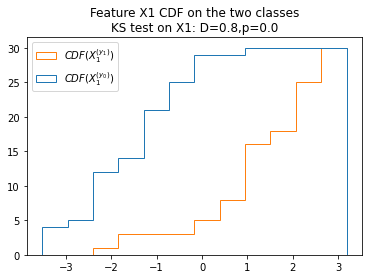

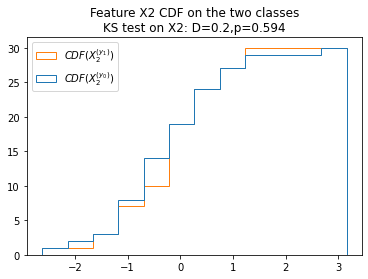

In [13]:
_ = KS(X,y, show = True)

## `ECoL`

In [14]:
setup_ECoL()
ECoL_metrics(X,y)

R[write to console]: Installing packages into 'C:/Users/eleve/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



({'overlapping.F1.mean': 0.4027582031317379,
  'overlapping.F1.sd': 0.47839672891310947,
  'overlapping.F1v.mean': 0.725,
  'overlapping.F1v.sd': 0.03535533905932741,
  'overlapping.F2.mean': 0.7166666666666667,
  'overlapping.F2.sd': 0.2616330237780185,
  'overlapping.F3.mean': 0.21143857773543168,
  'overlapping.F3.sd': 0.11241300675009834,
  'overlapping.F4.mean': nan,
  'overlapping.F4.sd': 0.08091196867571801,
  'neighborhood.N1': 0.11121386281545358,
  'neighborhood.N2.mean': 0.2542372881355932,
  'neighborhood.N2.sd': 0.4372884724873967,
  'neighborhood.N3.mean': 0.2175486755928619,
  'neighborhood.N3.sd': 0.0998539381017887,
  'neighborhood.N4.mean': 0.26666666666666666,
  'neighborhood.N4.sd': 0.4459484908564835,
  'neighborhood.T1.mean': 0.09006072605385092,
  'neighborhood.T1.sd': 0.28222603644366473,
  'neighborhood.LSC': 0.03333333333333333,
  'linearity.L1.mean': 0.03333333333333333,
  'linearity.L1.sd': 1.0},
 'overlapping.F1.mean\t0.4027582031317379\noverlapping.F1.sd\t

## `get_metrics()`

Return a dictionary of all metrics

In [15]:
get_metrics(X,y)

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


({'classification.ACC': 0.9,
  'classification.Kappa': 0.8,
  'classification.F1_Score': 0.9,
  'classification.Jaccard': 0.8181818181818182,
  'classification.Precision': 0.9,
  'classification.Recall': 0.9,
  'classification.McNemar': 0.6830913983096086,
  'classification.McNemar.CHI2': 0.16666666666666666,
  'classification.CochranQ': 1.0,
  'classification.CochranQ.T': 0.0,
  'classification.CrossEntropy': 0.6902442451464471,
  'classification.Mean_KLD': 0.6902442451464471,
  'classification.AP': 0.9496893963781106,
  'classification.Brier': 0.24854854456045616,
  'classification.ROC_AUC': 0.9277777777777778,
  'classification.PR_AUC': 0.9490515409214031,
  'classification.BER': 0.020761033389453898,
  'correlation.IG': [0.39806530243419913, 0.0072766756747406625],
  'correlation.IG.max': 0.39806530243419913,
  'correlation.r': [0.7416727355635289, 0.017177211340979777],
  'correlation.r2': [0.5500784466782882, 0.0002950565894526843],
  'correlation.r.p': [1.2116341137234975e-11, 0

## `get_json`



In [16]:
get_json(X,y)

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


'[{"classification.ACC": 0.9, "classification.Kappa": 0.8, "classification.F1_Score": 0.9, "classification.Jaccard": 0.8181818181818182, "classification.Precision": 0.9, "classification.Recall": 0.9, "classification.McNemar": 0.6830913983096086, "classification.McNemar.CHI2": 0.16666666666666666, "classification.CochranQ": 1.0, "classification.CochranQ.T": 0.0, "classification.CrossEntropy": 0.6902442451464471, "classification.Mean_KLD": 0.6902442451464471, "classification.AP": 0.9496893963781106, "classification.Brier": 0.24854854456045616, "classification.ROC_AUC": 0.9277777777777778, "classification.PR_AUC": 0.9490515409214031, "classification.BER": 0.02105518736273626, "correlation.IG": [0.39806530243419913, 0.010054453452518208], "correlation.IG.max": 0.39806530243419913, "correlation.r": [0.7416727355635289, 0.017177211340979777], "correlation.r2": [0.5500784466782882, 0.0002950565894526843], "correlation.r.p": [1.2116341137234975e-11, 0.8963569761285588], "correlation.r.max": 0.

## `get_html`

Return a piece of HTML to be embedded in web applications.

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


Metric/Statistic
BER = 0.021797391947362854
"{'classification.ACC': 0.9, 'classification.Kappa': 0.8, 'classification.F1_Score': 0.9, 'classification.Jaccard': 0.8181818181818182, 'classification.Precision': 0.9, 'classification.Recall': 0.9, 'classification.McNemar': 0.6830913983096086, 'classification.McNemar.CHI2': 0.16666666666666666, 'classification.CochranQ': 1.0, 'classification.CochranQ.T': 0.0, 'classification.CrossEntropy': 0.6902442451464471, 'classification.Mean_KLD': 0.6902442451464471, 'classification.AP': 0.9496893963781106, 'classification.Brier': 0.24854854456045616, 'classification.ROC_AUC': 0.9277777777777778, 'classification.PR_AUC': 0.9490515409214031}regularization strength [0.0001] classification.ACC 0.9 classification.Kappa 0.8 classification.F1_Score 0.9 classification.Jaccard 0.8181818181818182 classification.Precision 0.9 classification.Recall 0.9 classification.McNemar 0.6830913983096086 classification.McNemar.CHI2 0.16666666666666666 classification.CochranQ 1.0 classification.CochranQ.T 0.0 classification.CrossEntropy 0.6902442451464471 classification.Mean_KLD 0.6902442451464471 classification.AP 0.9496893963781106 classification.Brier 0.24854854456045616 classification.ROC_AUC 0.9277777777777778 classification.PR_AUC 0.9490515409214031"
IG = [0.3980653 0.00727668]
"#### Correlation between X1 and y #### Pearson r: 0.742, p-value: 0.0 Spearman rho: 0.741, p-value: 0.0 Kendall's tau: 0.61, p-value: 0.0 #### Correlation between X2 and y #### Pearson r: 0.017, p-value: 0.896 Spearman rho: 0.064, p-value: 0.625 Kendall's tau: 0.053, p-value: 0.62"
"ANOVA p[1.2116341137234846e-11, 0.8963569761285523]"
"MANOVA p = 2.220446049250313e-16endog: ['X1', 'X2'] exog: ['Intercept', 'y'] Multivariate linear model ============================================================ ------------------------------------------------------------ Intercept Value Num DF Den DF F Value Pr > F ------------------------------------------------------------ Wilks' lambda 0.6201 2.0000 57.0000 17.4576 0.0000 Pillai's trace 0.3799 2.0000 57.0000 17.4576 0.0000 Hotelling-Lawley trace 0.6125 2.0000 57.0000 17.4576 0.0000 Roy's greatest root 0.6125 2.0000 57.0000 17.4576 0.0000 ------------------------------------------------------------ ------------------------------------------------------------ y Value Num DF Den DF F Value Pr > F ------------------------------------------------------------ Wilks' lambda 0.4497 2.0000 57.0000 34.8823 0.0000 Pillai's trace 0.5503 2.0000 57.0000 34.8823 0.0000 Hotelling-Lawley trace 1.2239 2.0000 57.0000 34.8823 0.0000 Roy's greatest root 1.2239 2.0000 57.0000 34.8823 0.0000 ============================================================"
"MWW p = [1.3111030420756061e-08, 0.6256257625776984]"
"K-S p = [8.466416460035895e-10, 0.5940706297759378]"
"CHISQ p = [0.026304806878803193, 0.9724108429964956]"
ES = [2.17426404 0.03378198]

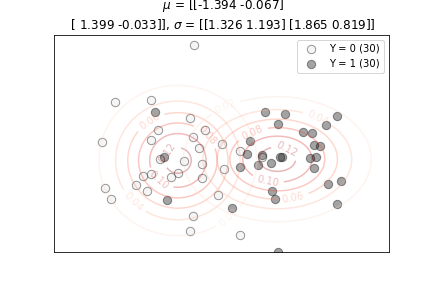
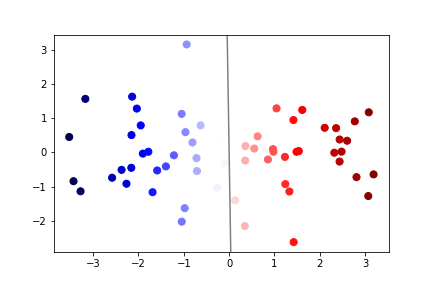
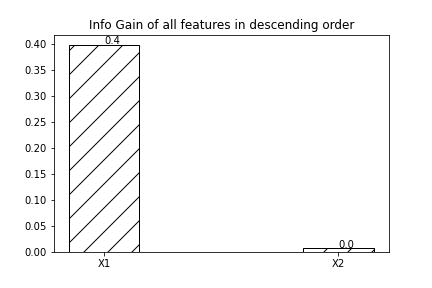
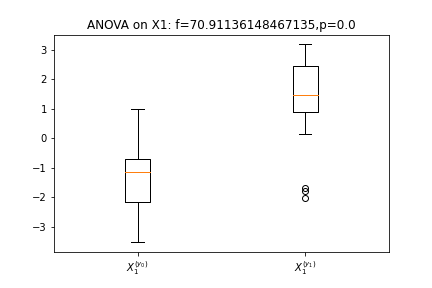
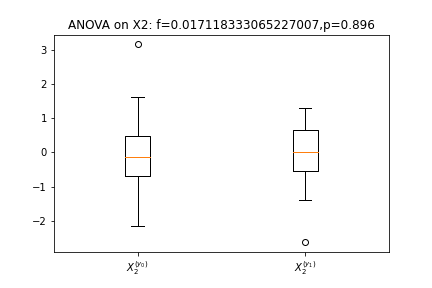
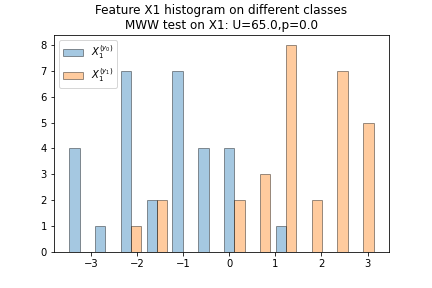
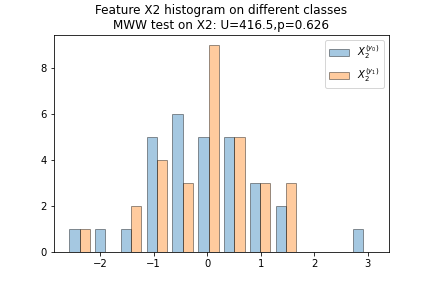
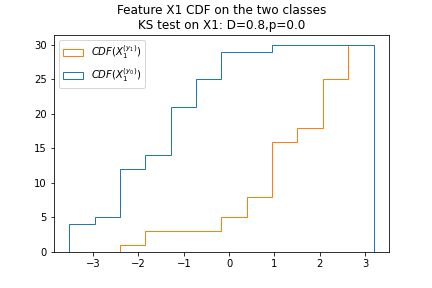
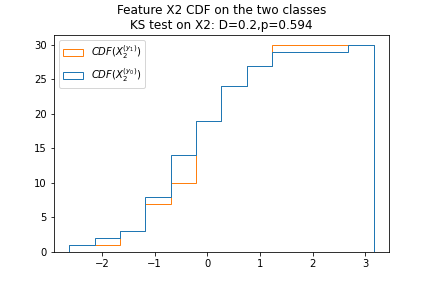
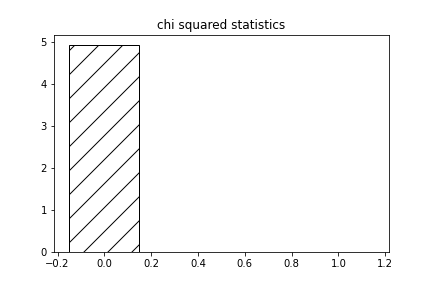
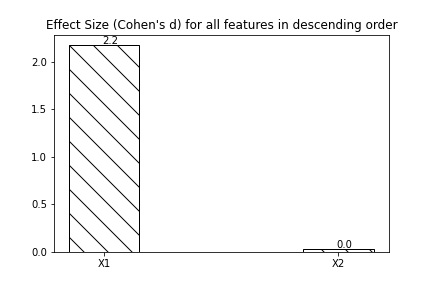

In [17]:
from IPython.display import display, HTML
display(HTML(get_html(X,y)))

## Metric Consistency Test

1. Analyze how the metrics change with datasets / their consistency   
2. Extract a common component.

Generate a series of sample datasets with different class distances, and calculate metrics on these datasets. 

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)
 25%|█████████████████████                                                               | 1/4 [00:01<00:03,  1.22s/it]C:\Users\eleve\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\eleve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)
 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.38s/it]C:\Users

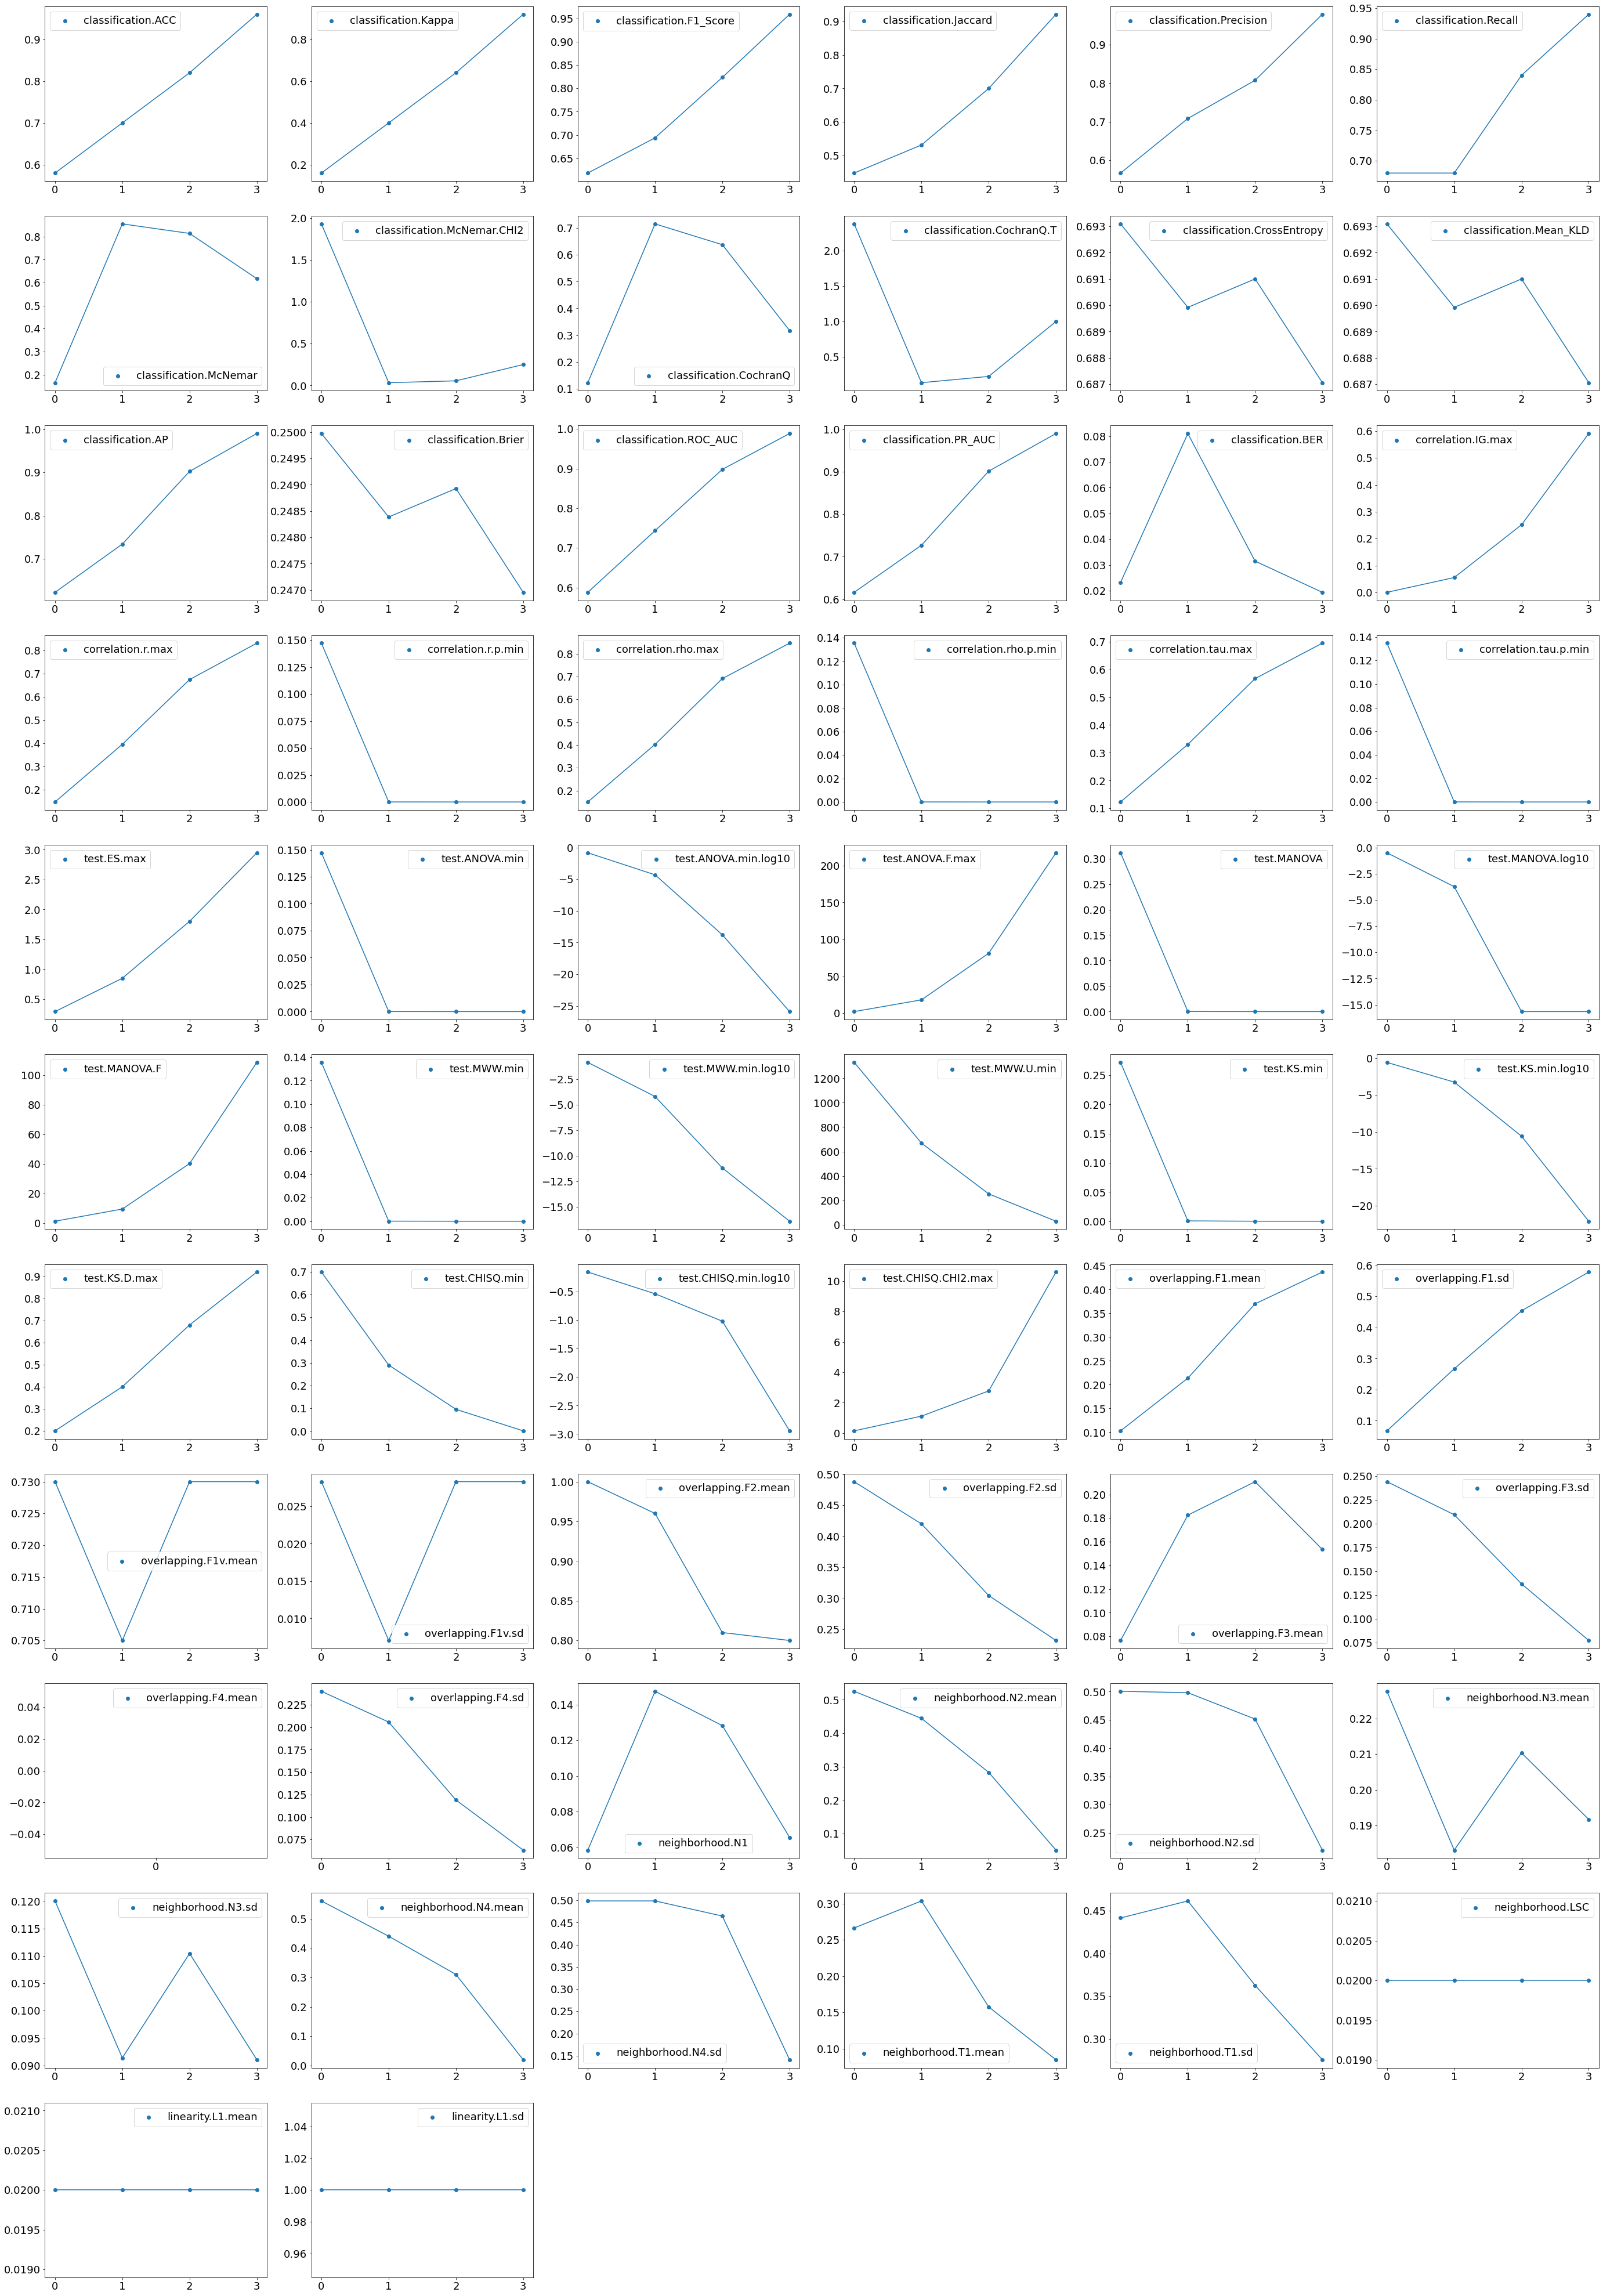

In [18]:
dcts = simulate(np.linspace(0, 3, 4), repeat = 1, nobs = 50)
visualize_dcts(dcts)

Repeat N times to get the averaged curves against different md values.

100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [15:33<00:00,  2.10s/it]

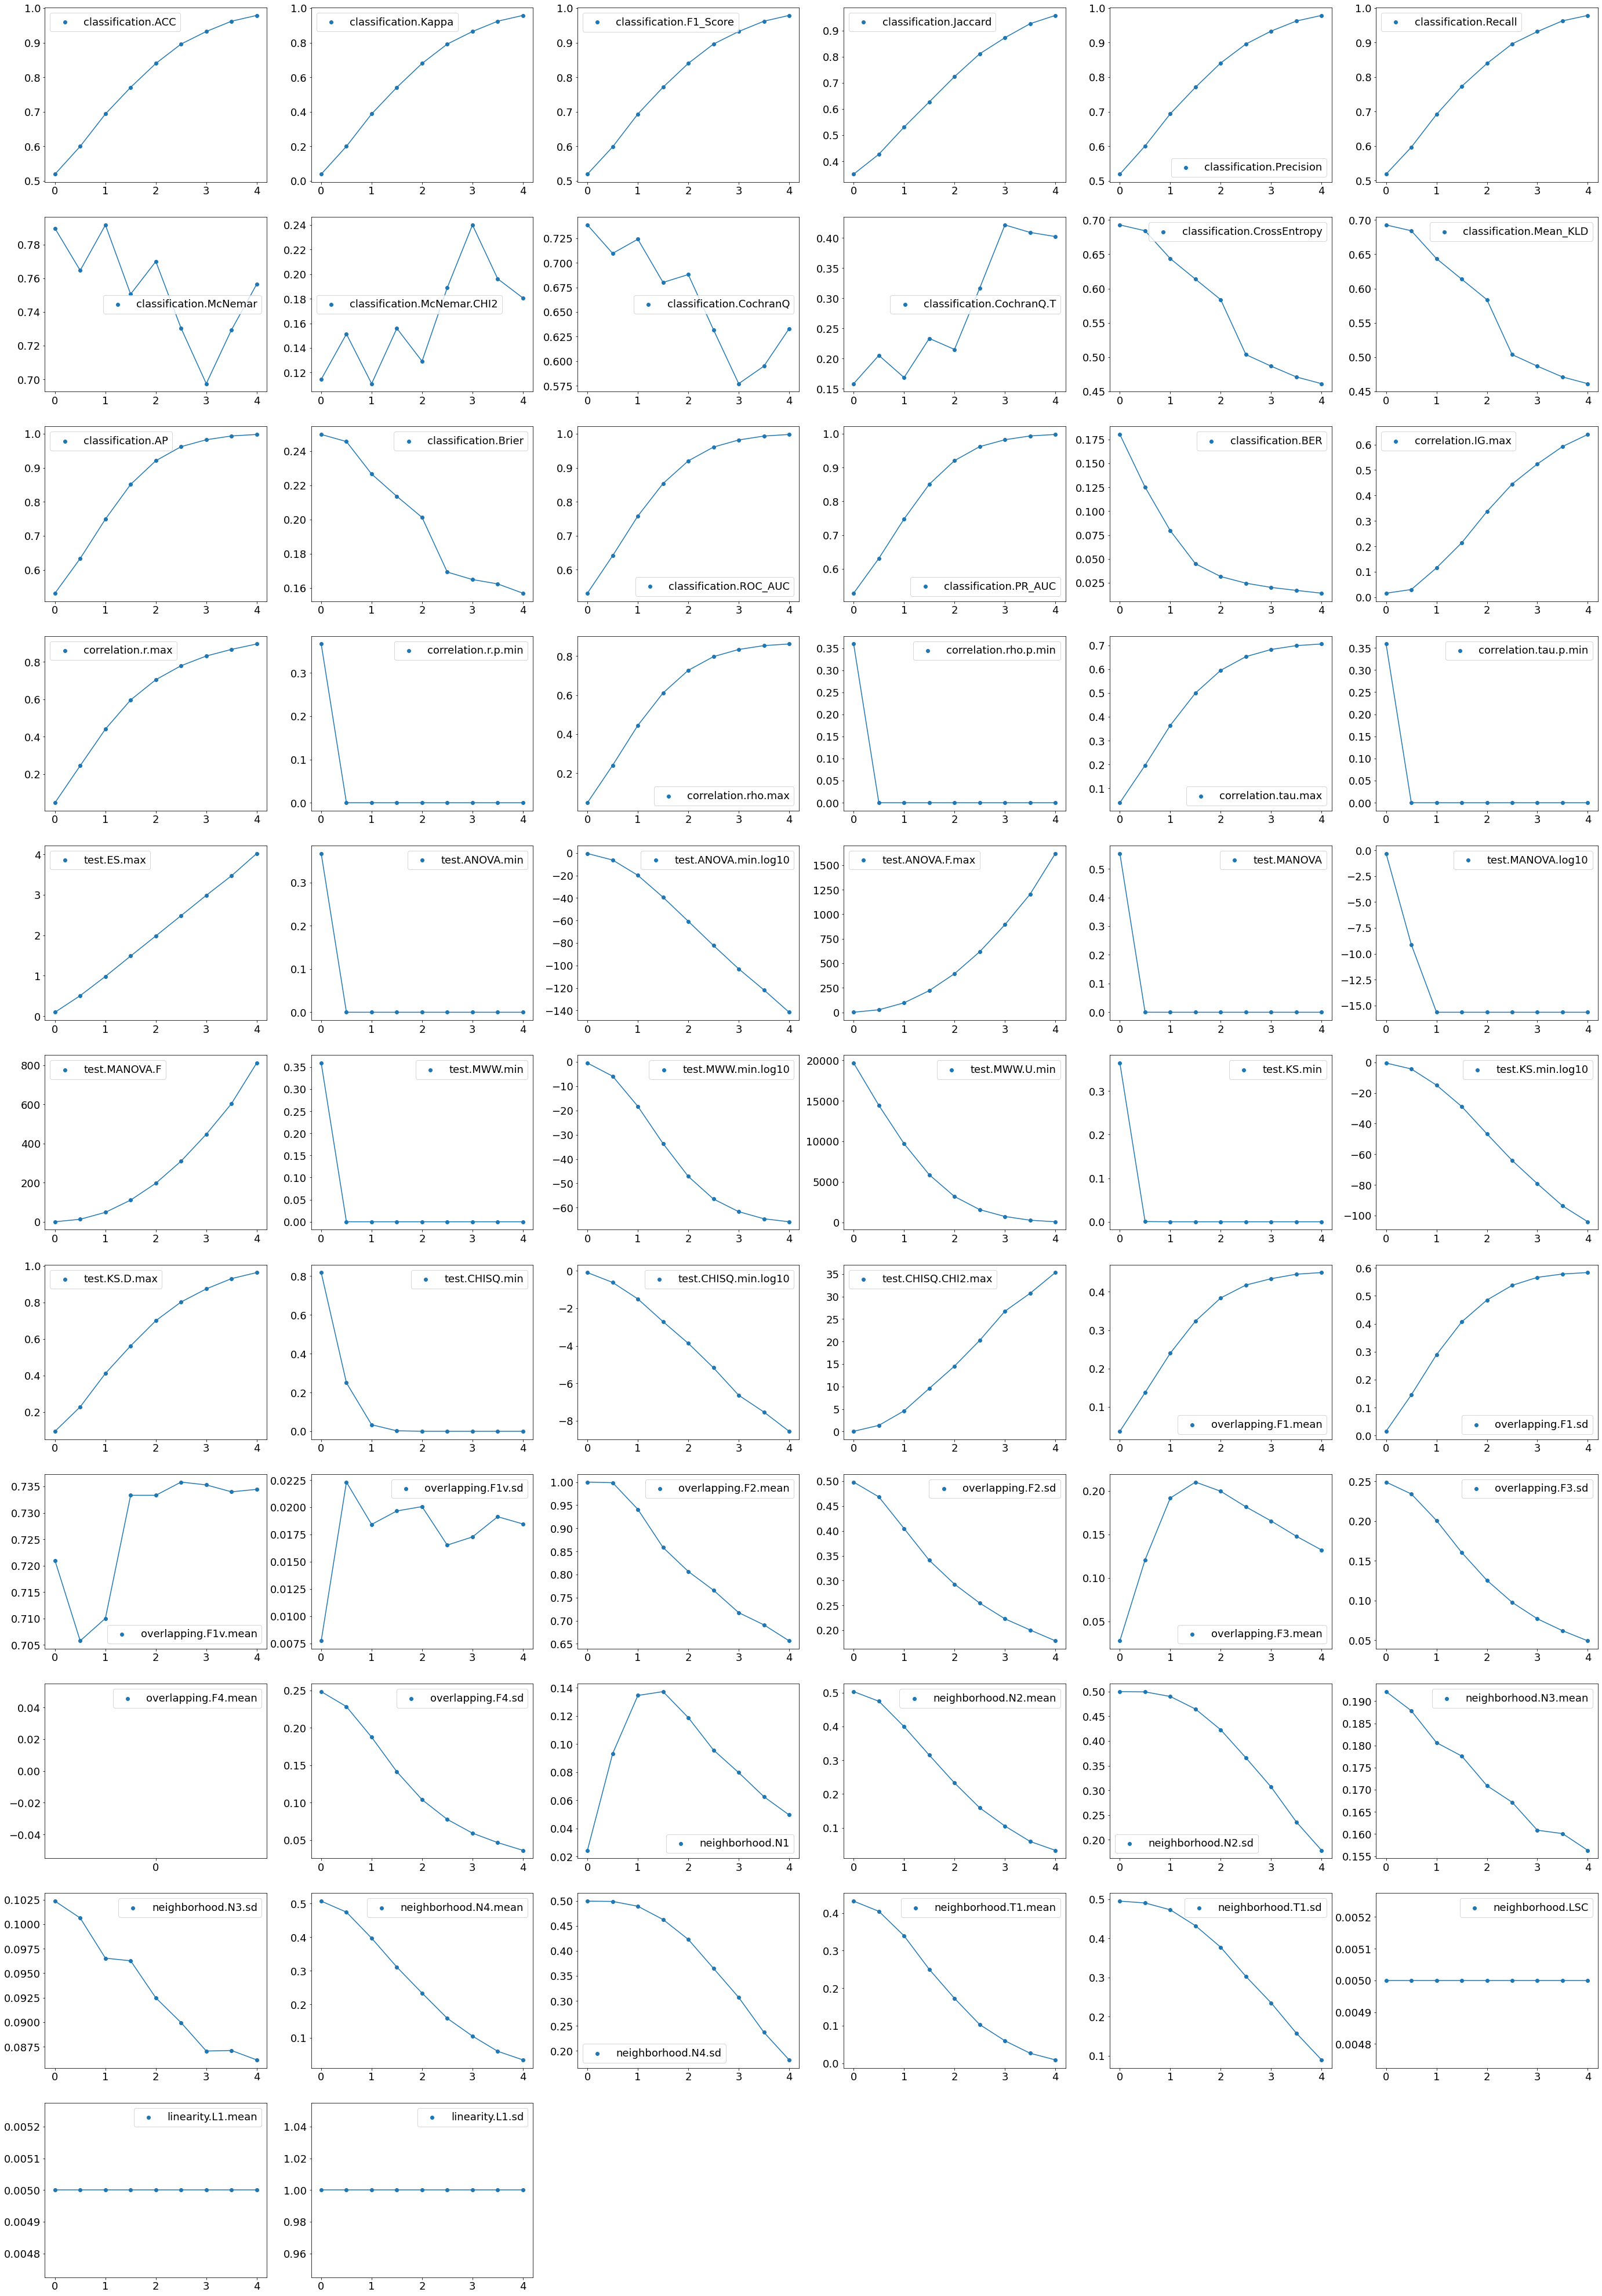

In [20]:
import warnings
warnings.filterwarnings('ignore')

dcts = simulate(np.linspace(0, 4, 9), repeat = 50, nobs = 200)
visualize_dcts(dcts)

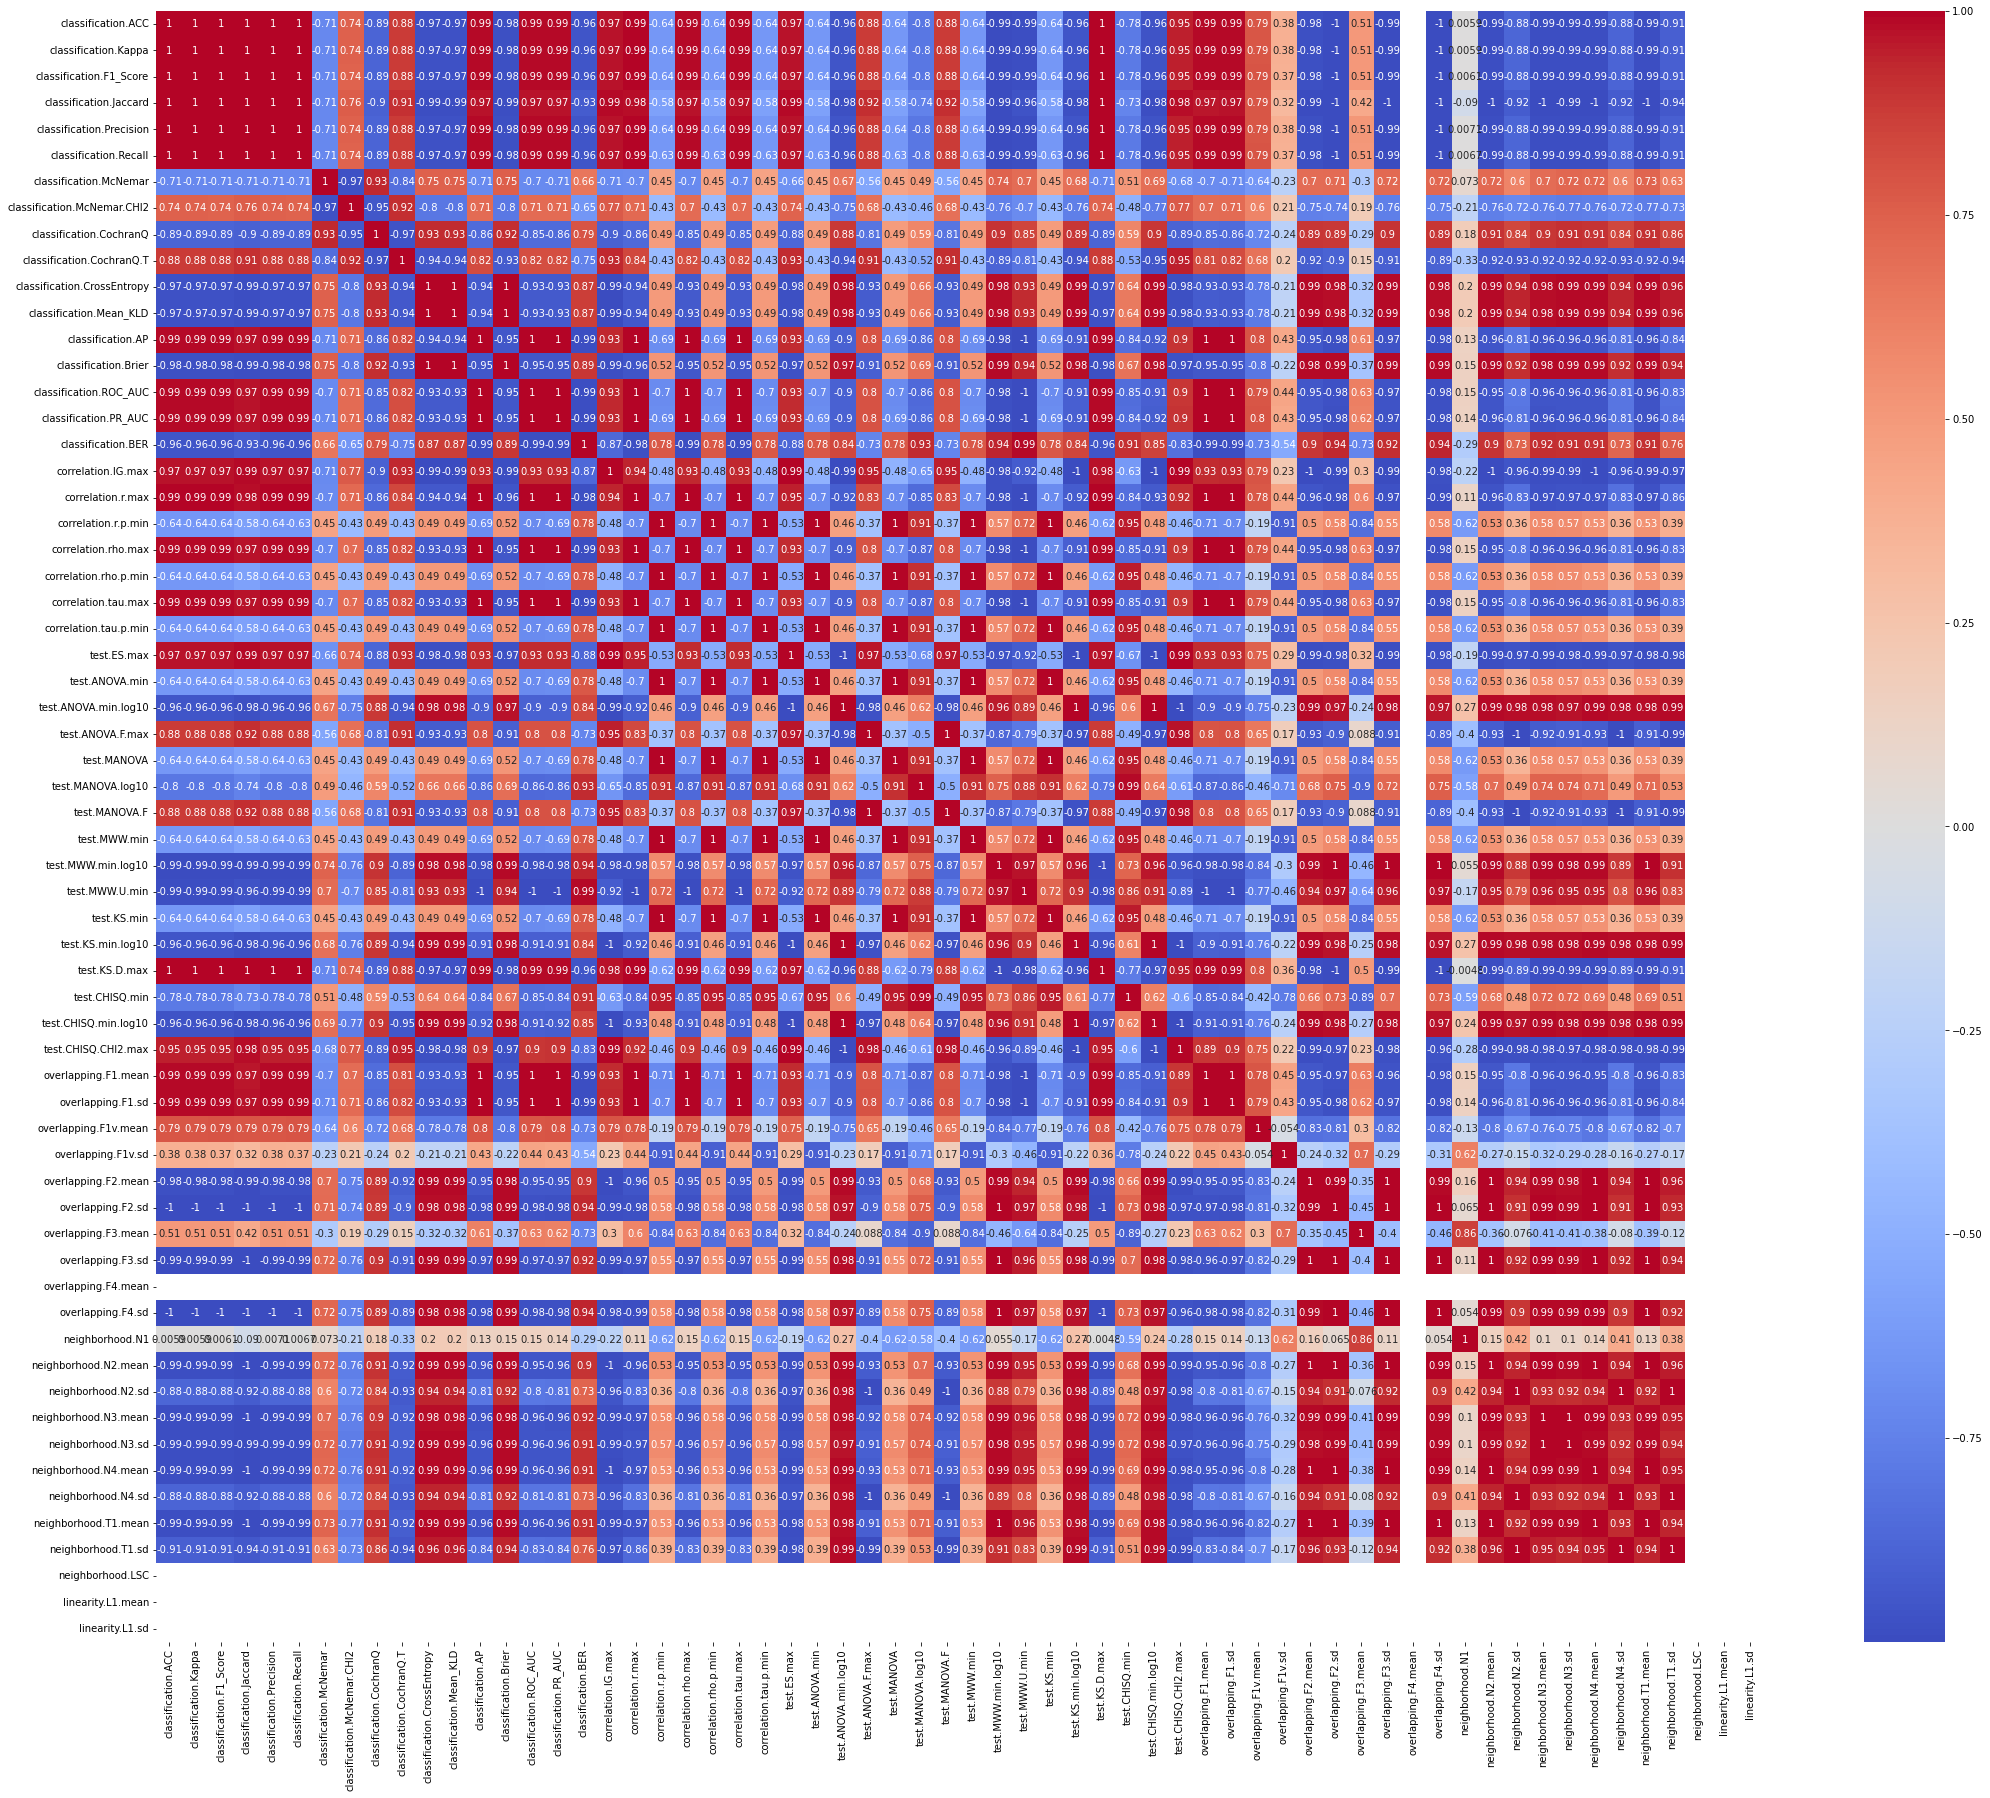

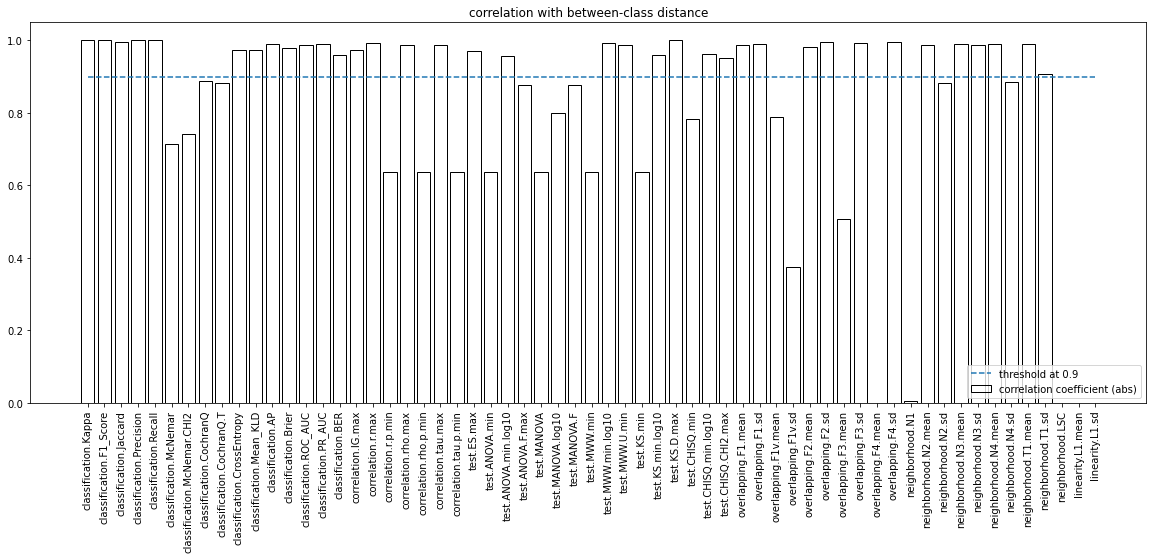

Metrics above the threshold:  ['classification.Kappa' 'classification.F1_Score' 'classification.Jaccard'
 'classification.Precision' 'classification.Recall'
 'classification.CrossEntropy' 'classification.Mean_KLD'
 'classification.AP' 'classification.Brier' 'classification.ROC_AUC'
 'classification.PR_AUC' 'classification.BER' 'correlation.IG.max'
 'correlation.r.max' 'correlation.rho.max' 'correlation.tau.max'
 'test.ES.max' 'test.ANOVA.min.log10' 'test.MWW.min.log10'
 'test.MWW.U.min' 'test.KS.min.log10' 'test.KS.D.max'
 'test.CHISQ.min.log10' 'test.CHISQ.CHI2.max' 'overlapping.F1.mean'
 'overlapping.F1.sd' 'overlapping.F2.mean' 'overlapping.F2.sd'
 'overlapping.F3.sd' 'overlapping.F4.sd' 'neighborhood.N2.mean'
 'neighborhood.N3.mean' 'neighborhood.N3.sd' 'neighborhood.N4.mean'
 'neighborhood.T1.mean' 'neighborhood.T1.sd']


In [21]:
visualize_corr_matrix(dcts, 'coolwarm')

    pca = extract_PC(dcts)
    pca.explained_variance_ratio_, pca.components_[0]

## Appendix: Libraries and versions

In [22]:
import sklearn
import scipy
import statsmodels
import numpy
import pandas
import rpy2
import seaborn
import matplotlib

print("sklearn", sklearn.__version__, "\n",
      "scipy", scipy.__version__, "\n",
      "statsmodels", statsmodels.__version__,  "\n",
      "numpy", numpy.__version__, "\n",
      "pandas", pandas.__version__, "\n",
      "matplotlib", matplotlib.__version__, "\n",
      "seaborn", seaborn.__version__, "\n",
      "rpy2", rpy2.__version__)

print("ECoL (R package) 0.4.2")

sklearn 1.0.2 
 scipy 1.7.3 
 statsmodels 0.13.2 
 numpy 1.21.5 
 pandas 1.4.2 
 matplotlib 3.5.1 
 seaborn 0.11.2 
 rpy2 3.5.5
ECoL (R package) 0.4.2


## Appendix: py script used as a call interface for upper applications

    from pyCLAMs.pyCLAMs import *
    import sys
    import json
    import uuid 
    import os

    def generate(d, n):

        X,y = mvg(nobs = n, md = d)

        # get the local file path
        fn = os.path.dirname(os.path.realpath(__file__)) + "/" + str(uuid.uuid4()) + ".csv"

        # save to csv file
        save_file(X,y, fn)

        return fn

    def analyze(csv):

        # X,y = load_file(csv)
        # s = get_html(X,y)

        # store html result into a local html file
        fn = os.path.dirname(os.path.realpath(__file__)) + "/" + str(uuid.uuid4()) + ".html"    
        with open(fn, 'w') as f:
            f.write(analyze_file(csv))

        return fn

    if __name__ == "__main__":

        mode = sys.argv[1]

        # Mode 1: generate a sample data file
        if mode == 'generate':

            d = float(sys.argv[2]) # distance between means, respect to std, i.e. (mu2 - mu1) / std, or how many stds is the difference.
            n = int(sys.argv[3]) # number of observations / samples

            fn = generate(d, n)

            print(fn)

        # Mode 2: analyze a local data file
        elif mode == 'analyze':        

            csv = sys.argv[2]

            fn = analyze(csv)

            print(fn)

        # Mode 3: generate + analyze
        elif mode == 'generate_analyze':        

            d = float(sys.argv[2]) # distance between means, respect to std, i.e. (mu2 - mu1) / std, or how many stds is the difference.
            n = int(sys.argv[3]) # number of observations / samples

            csv = generate(d, n)
            fn = analyze(csv)

            ### Without the intermediate csv file
            # X,y = mvg(nobs = n, md = d)
            # fn = os.path.dirname(os.path.realpath(__file__)) + "/" + str(uuid.uuid4()) + ".html" 
            # with open(fn, 'w') as f:
            #     f.write(get_html(X,y))

            print(fn)

## Trouble Shooting

### 1. module 'rpy2.robjects.conversion' has no attribute 'py2rpy'

> pip insall rpy2==3.4.4 # use the correct version

### 2. R_HOME must be set in the environment or Registry

    Install R
    Create R_HOME system variable
    Add R_HOME\bin to the PATH, in order to execute R from python
    Add R_HOME\bin\x64 to the PATH, in order to load R.dll
    Install package tzlocal
    May also need to reinstall rpy2

### 3. unable to initialize the JIT

    Happens only on Windows Server OS. Remains to research

## Appendix: wCLAMs - A web GUI tool based on pyCLAMs (out of date)

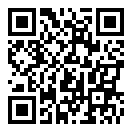

## Appendix: Code Ocean Capsule (out of date)

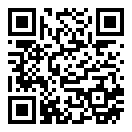